* Set objective function to glucose minimization
* Set upper bounds for biomass: 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 (0.30 is max Rhodotorula growth rate in lab)
* Find exchange fluxes 

In [1]:
import cobra
import pandas as pd
import os
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.sampling import sampling
import numpy as np
os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
import rpy2.robjects
from plotnine import *
import matplotlib.pyplot as plt

In [18]:
# Importing the model
model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880.xml")

In [19]:
# Change glucose bounds
model.reactions.get_by_id("EX_glc__D_e").upper_bound = 9999
model.reactions.get_by_id("EX_glc__D_e").lower_bound = -9999


In [20]:
# Changing the objective function to glucose min
model.objective = "EX_glc__D_e" 
solution = model.optimize() 

In [21]:
# # # Get all flux values, make them to a csv file
# model.reactions.BIOMASS_RT.bounds = 0.05, 0.05
# model.optimize('minimize')
# all_fluxes = pd.DataFrame(solution.fluxes)
# all_fluxes
# all_fluxes.to_csv('all_fluxes_glc_min_GR_0.05.csv', index=True)

In [5]:
# Getting biomass compositions???
# Muuda biomassi compositionite koeffitsiente - proovimiseks


In [6]:
# Getting exchange fluxes: glucose, CO2, ammonium and other minerals, others, like glycerol ['glc__D_e', 'o2_e', 'glyc_e', 'nh4_e',	'so4_e',	'pi_e', 'co2_e']  

# Make a pd dataframe with all exchange fluxes that are not zero, then make a pivot table with wanted metabolites fluxes on different growth rates
GR_range= [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]

model.reactions.BIOMASS_RT.bounds = GR_range[0], GR_range[0]
solution = model.optimize('minimize')
exchange_fluxes_all = model.summary().to_frame()
exchange_fluxes_all['GR'] = GR_range[0]


for i in range(1, len(GR_range)):
    model.reactions.BIOMASS_RT.bounds = GR_range[i], GR_range[i]
    solution = model.optimize('minimize')
    model_summary = model.summary().to_frame()
    model_summary['GR'] = GR_range[i]
    exchange_fluxes_all = pd.concat([exchange_fluxes_all, model_summary], axis=0)  
    
exchange_fluxes_all = exchange_fluxes_all[(exchange_fluxes_all['flux']) != 0.0] # for getting non-zero fluxes only
exchange_fluxes_all['flux'] = abs(exchange_fluxes_all['flux'])




In [7]:
# Get all non-zero exchange fluxes to a pivot table
exchange_fluxes_table_all = pd.pivot_table(exchange_fluxes_all, values='flux', index=['GR'], columns=['metabolite'])

exchange_fluxes_table_all

metabolite,3aap_c,4oglu_c,8aonn_m,amob_m,ca2_e,co2_e,cu2_e,dad_5_m,fe2_e,fe3_e,...,trnamet_c,trnaphe_c,trnapro_c,trnaser_c,trnathr_c,trnatrp_c,trnatyr_c,trnaval_c,zn2_e,zymst_e
GR,,,,,,,,,,,,,,,,,,,,,
0.05,0.035413,0.000070,0.000121,0.000121,0.000042,1.803280,0.000026,0.000121,0.000214,0.000308,...,0.002853,0.004758,0.011795,0.016844,0.010906,0.001166,0.003118,0.013758,0.000026,0.006747
0.10,0.070826,0.000139,0.000242,0.000242,0.000083,3.423804,0.000053,0.000242,0.000428,0.000617,...,0.005705,0.009516,0.023590,0.033687,0.021813,0.002332,0.006236,0.027517,0.000051,0.013495
0.15,0.106239,0.000209,0.000363,0.000363,0.000125,5.044459,0.000079,0.000363,0.000643,0.000925,...,0.008557,0.014275,0.035385,0.050530,0.032719,0.003498,0.009354,0.041275,0.000077,0.020242
0.20,0.141652,0.000279,0.000484,0.000484,0.000166,6.665114,0.000105,0.000484,0.000857,0.001234,...,0.011410,0.019033,0.047179,0.067374,0.043626,0.004664,0.012473,0.055034,0.000102,0.026989
0.25,0.177065,0.000348,0.000605,0.000605,0.000208,8.285770,0.000131,0.000605,0.001071,0.001542,...,0.014262,0.023791,0.058974,0.084218,0.054532,0.005830,0.015591,0.068792,0.000128,0.033736
0.30,0.212478,0.000418,0.000725,0.000725,0.000250,9.906425,0.000157,0.000725,0.001285,0.001851,...,0.017115,0.028549,0.070769,0.101061,0.065439,0.006996,0.018709,0.082550,0.000153,0.040483


In [8]:
# Get specific metabolites with their fluxes
exchange_fluxes_table = pd.pivot_table(exchange_fluxes_all[exchange_fluxes_all.metabolite.isin(['glc__D_e', 'o2_e', 'glyc_e', 'nh4_e',	'so4_e',	'pi_e', 'co2_e'])], 
                                       values='flux', index=['GR'], columns=['metabolite'])

exchange_fluxes_table

metabolite,co2_e,glc__D_e,nh4_e,o2_e,pi_e,so4_e
GR,,,,,,
0.05,1.803280,0.691224,0.330015,1.617112,0.013311,0.005012
0.10,3.423804,1.351989,0.660029,3.051467,0.026622,0.010024
0.15,5.044459,2.012776,0.990044,4.485954,0.039932,0.015036
0.20,6.665114,2.673563,1.320059,5.920441,0.053243,0.020048
0.25,8.285770,3.334350,1.650074,7.354929,0.066554,0.025060
0.30,9.906425,3.995137,1.980088,8.789416,0.079864,0.030071


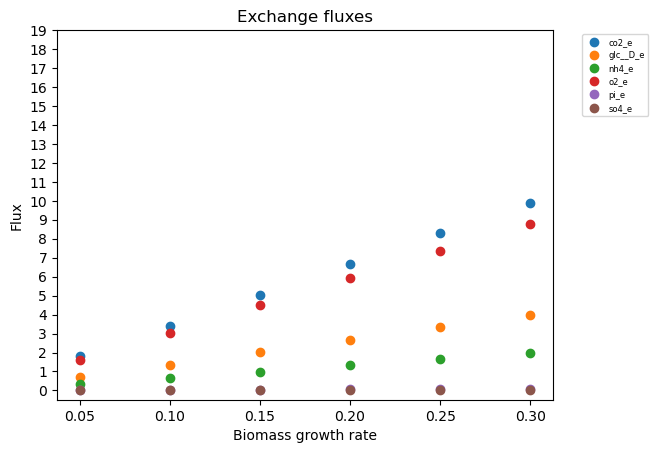

In [9]:
# Make plots for exchange reactions

plt.plot(GR_range, exchange_fluxes_table[exchange_fluxes_table.columns], 'o', label = exchange_fluxes_table.columns)

plt.xlabel('Biomass growth rate')
plt.ylabel('Flux')
plt.title("Exchange fluxes")
plt.legend(fontsize=6, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.yticks(range(0, 20, 1))
plt.show()

In [10]:
# # Export DataFrames to excel - NB! Will overwrite the pages
# with pd.ExcelWriter("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Simulated_fluxes\\Ex_fluxes_glc_min.xlsx") as excel_writer:
#     exchange_fluxes_table_all.to_excel(excel_writer, sheet_name='Sheet1', index=True)


In [17]:

# import escher
# escher.Builder(reaction_data=all_fluxes)


,fluxes
ALCD25yi,0.0
MTHFCm,0.0
AMPN,0.0
DAGCPTer_RT,0.0
PYRt2,0.0
...,...
FOLt,0.0
NADtm,0.0
EX_pydxn_e,0.0
PYDXNtr,0.0
